# CLASE 5: MANEJO DE SERIES DE TIEMPO.
---

## Representación del tiempo en Pandas.
**Pandas** fue desarrollado originalmente con el objetivo de generar análisis financieros de gran profundidad, por lo cual, como cabría esperar, se trata de una librería que dispone de varias herramientas para el trabajo con fechas, variables de tiempo y data indexada conforme períodos o momentos en el tiempo, es decir, **series de tiempo**. El tiempo y las fechas vienen en diferentes formatos, a saber:

- **Timestamps**, los cuales sirven como referencia para un determinado **momento del tiempo**.
- **Intervalos de tiempo y períodos**, los que hacen referencia a una **longitud de tiempo**, con un determinado inicio y término; por ejemplo, el año 2021. Los períodos usualmente corresponden a un caso especial de intervalos de tiempo, en el cual cada intervalo es de longitud uniforme y no existe superposición entre ellos (por ejemplo, períodos de 24 horas, que constituyen días).
- **Time-deltas o duraciones** que referencian a un **período exacto de tiempo** (por ejemplo, una duración de 28.56 segundos).

Python dispone de una cierta cantidad de representaciones para fechas, períodos o time-deltas. Mientras que las herramientas de **Pandas** para trabajar con series de tiempo tienen a su alcance una enorme cantidad de funcionalidades, normalmente es útil verificar su relación con otros paquetes utilizados en Python.

### Representación nativa de fechas y tiempo en Python. 
Los objetos básicos de Python para trabajar con tiempos y fechas residen en el módulo nativo **datetime**. Junto con la librería **dateutil**, podemos usar ambos para, rápidamente, realizar una buena cantidad de operaciones sobre nuestras series de tiempo. Por ejemplo, podemos construir manualmente una fecha cuyo tipo de dato efectivamente referencie a un objeto relativo a fechas (en este caso, el tipo será `datetime`, dependiente de la librería **datetime**):

In [1]:
import datetime as dt

In [2]:
# Definimos un objeto de tipo dt.datetime que representa una fecha en Python.
dt.datetime(year=2022, month=8, day=24)

datetime.datetime(2022, 8, 24, 0, 0)

O podemos usar la librería **dateutil** para analizar fechas en una amplia variedad de formatos de tipo string que hagan referencia a alguna fecha (recordemos, eso sí, que el idioma por defecto de Python es inglés):

In [3]:
from dateutil import parser

In [4]:
# Usamos la función parser() para analizar una fecha en formato string.
date = parser.parse("24th of August, 2022")

In [5]:
# Mostramos el resultado en pantalla.
date

datetime.datetime(2022, 8, 24, 0, 0)

Una vez que disponemos de un objeto de tipo `datetime`, podemos hacer cosas tales como imprimir en pantalla el día de la semana asociado a dicho objeto (de estar definido el día, por supuesto):

In [6]:
# Retornamos el día de la semana asociado a la fecha date mediante el método strftime(), usando
# una directiva de tiempo (en este caso "%A"). Ya profundizaremos en ellos más adelante.
date.strftime('%A')

'Wednesday'

En el código anterior, el método `strftime()` permite convertir un objeto en un string, de acuerdo a un formato dado de representación de tiempo. Otros métodos como `strptime()` permiten analizar un string y reformatearlo como un objeto de tipo `datetime` dado un formato correspondiente, conforme la sintaxis `strptime(<string_de_fecha>, <formato>)`. El formato que define un objeto de este tipo se especifica en la Tabla (5.1) (entre muchos otros formatos).

<p style="text-align: center;">Tabla (5.1): Algunas directivas de tiempo que podemos especificar</p>

| Directiva | Significado                                       | Ejemplo                                        |
| :-------- | :------------------------------------------------ | :--------------------------------------------- |
| `%a`      | Día de la semana especificado de forma abreviada. | `Sun`, `Mon`, ..., `Sat` (`en_US`)             |
| `%A`      | Día de la semana (nombre completo)                | `Sunday`, `Monday`, ..., `Saturday` (`en_US`)  |
| `%w`      | Día de la semana especificado como un número decimal, donde 0 representa al día Domingo, y 6 al día Sábado. | `0`, `1`, ..., `6` |
| `%d`      | Día del mes especificado como un número de dos dígitos (precedido de un cero cuando dicho número es menor que 10). | `01`, `02`, ..., `31` |
| `%b`      | Mes del año especificado de manera abreviada.     | `Jan`, `Feb`, …, `Dec` (`en_US`)               |
| `%B`      | Mes del año (nombre completo).                    | `January`, `February`, …, `December` (`en_US`) |
| `%m`      | Mes del año especificado como un número de dos dígitos (precedido de un cero cuando dicho número es menor que 10). | `01`, `02`, ..., `12` |
| `%y`      | Año representado como un número decimal de dos dígitos (precedido de un cero cuando dicho número es menor que 10). | `00`, `01`, ..., `99` |
| `%Y`      | Año representado como un número decimal de cuatro dígitos. | `0001`, `0002`, ..., `2013`, `2014`, ..., `9998`, `9999` |
| `%H`      | Hora (24 horas-reloj) representada como un número decimal de dos dígitos (precedido de un cero cuando dicho número es menor que 10). | `00`, `01` ..., `23` |
| `%I`      | Hora (12 horas-reloj) representada como un número decimal de dos dígitos (precedido de un cero cuando dicho número es menor que 10). | `01`, `02`, ..., `12` |
| `%p`      | Equivalente local de hora AM o PM. | `AM`, `PM` (`en_US`) |
| `%M`      | Minuto, representado como un número decimal de dos dígitos (precedido de un cero cuando dicho número es menor que 10). | `00`, `01`, ..., `59` |
| `%S`      | Segundo, representado como un número decimal de dos dígitos (precedido de un cero cuando dicho número es menor que 10). | `00`, `01`, ..., `59` |

### Representación del tiempo en Numpy.
El módulo **Numpy** dispone también de un tipo de dato que permite representar información relativa al tiempo mediante el uso de enteros de 64 bits, y que se conoce como `numpy.datetime64`. Por supuesto, esto permite representar este tipo de objetos en arreglos compactos, pero requiriendo, a nivel de sintaxis, un formato de imputación bastante específico:

In [7]:
import numpy as np

In [8]:
# Construimos un arreglo con un único elemento correspondiente a una fecha.
date = np.array('2022-08-24', dtype=np.datetime64)

In [9]:
# Mostramos este arreglo en pantalla.
date

array('2022-08-24', dtype='datetime64[D]')

Una vez que hemos formateado este arreglo poblado por una única fecha (o *timestamp*), podemos realizar rápidamente operaciones vectorizadas sobre ella usando `ufuncs` de **Numpy**:

In [10]:
# Sumamos 12 días a nuestra fecha.
date + np.arange(12)

array(['2022-08-24', '2022-08-25', '2022-08-26', '2022-08-27',
       '2022-08-28', '2022-08-29', '2022-08-30', '2022-08-31',
       '2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04'],
      dtype='datetime64[D]')

Dado que **Numpy** trabaja con arreglos restringidos a contener elementos de un único tipo, y que los objetos de tipo `np.datetime64` y `np.timedelta64` se representan mediante enteros de 64 bits, el rango de tiempos codificables es 264 veces estas unidades fundamentales. En otras palabras, estos tipos de datos imponen un trade-off entre la resolución del tiempo (su nivel de diversificación) y el máximo alcance posible de los intervalos que queramos trabajar. 

Además, estos tipos carecen de la flexibilidad del cambio de formatos provista por los módulos **datetime** y **dateutil**.

### El caso de Pandas.
La librería **Pandas** dispone de un objeto conocido como `pd.Timestamp` (en adelante, únicamente `Timestamp`), el cual combina lo mejor de los ejemplos vistos previamente en el manejo de data que representa tiempos. Para el uso de estos objetos de tipo `Timestamp`, **Pandas** puede construir un índice especial, llamado `DatetimeIndex`, que puede ser usado para indexar data en una serie o DataFrame.

Veamos un ejemplo de uso inicial, en el cual usaremos la función `pd.to_datetime()` para convertir un string que hace referencia a una fecha a un objeto de tipo `Timestamp`:

In [11]:
import pandas as pd

In [12]:
# Convertimos un string a Timestamp.
date = pd.to_datetime("24th of August, 2022")

In [13]:
# Mostramos este objeto en pantalla.
date

Timestamp('2022-08-24 00:00:00')

Todo `Timestamp` puede ser analizado mediante el método `strftime()`, el que nos permite, mediante el uso de cualquiera de las directivas de tiempo especificadas en la Tabla (5.1), recuperar información relativa dicho `Timestamp`:

In [14]:
date.strftime('%A')

'Wednesday'

Adicionalmente, podemos realizar operaciones vectorizadas típicas de **Numpy** directamente sobre este mismo objeto. Por ejemplo, podemos replicar la suma de 12 días sobre el `Timestamp` anterior usando la función `pd.to_timedelta()`:

In [15]:
date + pd.to_timedelta(np.arange(12), unit='D')

DatetimeIndex(['2022-08-24', '2022-08-25', '2022-08-26', '2022-08-27',
               '2022-08-28', '2022-08-29', '2022-08-30', '2022-08-31',
               '2022-09-01', '2022-09-02', '2022-09-03', '2022-09-04'],
              dtype='datetime64[ns]', freq=None)

La función `pd.to_timedelta()` utiliza el argumento `unit` para definir las unidades de tiempo que definen la operatoria correspondiente. En este caso, `unit="D"` hace referencia a que sumamos días. El string `"D"` se comoce como **código de frecuencia**, y un poco más adelante especificaremos otros más para generar operatorias sobre otras unidades de tiempo.

La razón por la cual las herramientas de manejo de data temporal de **Pandas** cobran una enorme relevancia es debido a que objetos como los timestamps permiten construir índices que referencian cualquier observación en un DataFrame o una serie a un momento, período o rango de tiempo. Por ejemplo, podemos construir una serie de este tipo como sigue:

In [16]:
# Definimos un índice compuesto por timestamps.
idx = pd.to_datetime(["2022-08-01", "2022-08-02", "2022-08-03", "2022-08-04", "2022-08-05", "2022-08-06"])

In [17]:
# Construimos una serie cuyo indexada conforme este objeto.
data = pd.Series(data=[0, 1, 2, 3, 4, 5], index=idx)

In [18]:
# Mostramos en pantalla esta serie.
data

2022-08-01    0
2022-08-02    1
2022-08-03    2
2022-08-04    3
2022-08-05    4
2022-08-06    5
dtype: int64

Ahora que disponemos de una serie de tiempo en una serie de **Pandas**, podemos hacer uso de cualquiera de los esquemas de selección de información estudiados previamente, pasando valores que pueden ser interpretados como fechas. Por ejemplo, podemos generar una selección mediante slicing:

In [19]:
data["2022-08-02":"2022-08-05"]

2022-08-02    1
2022-08-03    2
2022-08-04    3
2022-08-05    4
dtype: int64

Cuando la data está indexada mediante objetos de tipo `Timestamp`, es posible seleccionar data asociada a un período específico de tiempo. Consideremos la siguiente serie de tiempo:

In [20]:
# Otra serie de tiempo.
data = pd.Series(
    data=[0, 1, 2, 3, 4],
    index=pd.to_datetime(["2022-06-10", "2022-06-11", "2022-07-10", "2022-07-11", "2022-08-10"])
)

Podemos seleccionar la data relativa al mes de Junio específicando únicamente dicho mes, considerando que el formato de un objeto de tipo `Timestamp` es `aaaa-mm-dd`. Por lo tanto, para esta selección, podemos escribir:

In [21]:
# Seleccionamos únicamente datos de Junio.
data["2022-06"]

2022-06-10    0
2022-06-11    1
dtype: int64

Más adelante, veremos ejemplos adicionales de la conveniencia que existe al manejar objetos de tipo `Timestamp` como índices. Primero estudiaremos las estructuras de series de tiempo disponibles en **Pandas**.

## Series de tiempo en Pandas.
Vamos a introducir algunas estructuras de datos fundamentales de **Pandas** para trabajar con series de tiempo:

- Para los **descriptores temporales** (*timestamps*), **Pandas** nos provee del objeto `Timestamp`. Como se mencionó previamente, corresponde esencialmente a un reemplazo para el tipo `datetime.datetime`, nativo de Python, basado en la eficiencia del tipo `np.datetime64` de **Numpy**. La estructura indicial asociada a este tipo de datos corresponde a `DatetimeIndex`.

- Para **períodos de tiempo**, **Pandas** nos provee del tipo `Period`. Este tipo codifica un intervalo de tiempo de frecuencia fija basado en `np.datetime64`. La estructura indicial asociada a este tipo de datos corresponde a `PeriodIndex`.

- Para **duraciones** (*time-deltas*), **Pandas** nos provee del tipo `Timedelta`, el cual corresponde a un reemplazo mucho más eficiente para el tipo `datetime.timedelta` nativo de Python, y se basa en el tipo `np.timedelta64`. La estructura indicial asociada a este tipo de datos corresponde a `TimedeltaIndex`.

### Tipos de índices asociados a series de tiempo.
El más frecuente de estos esquemas corresponde al par `Timestamp` – `DatetimeIndex`. Mientras que estos objetos pueden ser llamados directamente, es más común utilizar la función `pd.to_datetime()`, la cual, como ya vimos previamente, puede analizar la sintaxis de una gran cantidad de formatos (incluyendo los vistos al iniciar esta sección) a fin de buscar fechas en ellos y pasarlos a formato `Timestamp`. Si pasamos una única fecha como argumento a esta función, generaremos unúnico objeto de tipo `Timestamp`, mientras que el paso de una serie de fechas (por ejemplo, en una lista de Python) retornará un objeto de tipo `DatetimeIndex`:

In [22]:
# Probamos las capacidades de la función pd.to_datetime().
dates = pd.to_datetime([dt.datetime(2021, 8, 18), "19th of August, 2021", "2021-Aug-20", "21/08/2021"])

In [23]:
# Mostramos los resultados.
dates

DatetimeIndex(['2021-08-18', '2021-08-19', '2021-08-20', '2021-08-21'], dtype='datetime64[ns]', freq=None)

Cualquier `DatetimeIndex` puede ser convertido a un `PeriodIndex` con el método `to_period()`, con la adición de un **código de frecuencia**. Por ejemplo, aquí usaremos `'D'` para indicar una frecuencia diaria:

In [24]:
dates.to_period('D')

PeriodIndex(['2021-08-18', '2021-08-19', '2021-08-20', '2021-08-21'], dtype='period[D]')

Por otro lado, podemos crear un `TimedeltaIndex` al restar una fecha de otra:

In [25]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days'], dtype='timedelta64[ns]', freq=None)

### Construcción de secuencias regulares.
Para hacer más conveniente la creación de secuencias de fechas regulares, **Pandas** nos ofrece algunas funciones muy útiles: `pd.date_range()` para timestamps, `pd.period_range()` para períodos y `pd.timedelta_range()` para time-deltas. Hemos visto que funciones tales como `range()` o `np.arange()` convierten un valor inicial, un valor final y un paso en una secuencia. Similarmente, la función `pd.range_date()` acepta una fecha de inicio, una fecha de término y un código opcional de frecuencia para crear una secuencia regular de fechas. Por defecto, la frecuencia es diaria:

In [26]:
# Construcción de una secuencia regular de fechas especificando inicio, final y frecuencia.
pd.date_range(start='2021-08-02', end='2021-08-10', freq="D")

DatetimeIndex(['2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09',
               '2021-08-10'],
              dtype='datetime64[ns]', freq='D')

Alternativamente, el intervalo de fechas puede ser especificado mediante una fecha de inicio y un número determinado de períodos:

In [27]:
# Construcción de una secuencia regular de fechas especificando inicio y número de períodos.
pd.date_range('2021-08-02', periods=9)

DatetimeIndex(['2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09',
               '2021-08-10'],
              dtype='datetime64[ns]', freq='D')

Podemos alterar la **granularidad** o frecuencia de las observaciones mediante el parámetro `freq`. Como dijimos, la opción por defecto es con granularidad diaria, pero podemos definir una frecuencia horaria usando el código de frecuencia `"H"`:

In [28]:
# Construcción de una secuencia regular de fechas especificando inicio y número de períodos,
# con granularidad horaria.
pd.date_range('2021-08-02', periods=10, freq="H")

DatetimeIndex(['2021-08-02 00:00:00', '2021-08-02 01:00:00',
               '2021-08-02 02:00:00', '2021-08-02 03:00:00',
               '2021-08-02 04:00:00', '2021-08-02 05:00:00',
               '2021-08-02 06:00:00', '2021-08-02 07:00:00',
               '2021-08-02 08:00:00', '2021-08-02 09:00:00'],
              dtype='datetime64[ns]', freq='H')

Para crear secuencias regulares de valores de tipo `Period` o `Timedelta`, la sintaxis de las funciones `pd.period_range()` y `pd.timedelta_range()` es bastante similar a lo visto con `pd.date_range()`. Por ejemplo, para construir una secuencia de períodos mensuales, podemos escribir:

In [29]:
pd.period_range('2021-07', periods=8, freq='M')

PeriodIndex(['2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
             '2022-01', '2022-02'],
            dtype='period[M]')

Y para el caso de una secuencia de time-deltas, bastará con escribir:

In [30]:
pd.timedelta_range(0, periods=20, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00',
                '0 days 12:00:00', '0 days 13:00:00', '0 days 14:00:00',
                '0 days 15:00:00', '0 days 16:00:00', '0 days 17:00:00',
                '0 days 18:00:00', '0 days 19:00:00'],
               dtype='timedelta64[ns]', freq='H')

Los **códigos de frecuencia** que podemos utilizar en la especificación de las granularidades de estas secuencias (esto es, la magnitud de tiempo constante que separa a cada observación) se resumen en la Tabla (5.2).

<p style="text-align: center;">Tabla (5.2): Códigos de frecuencia</p>

| Código | Descripción                | Código | Descripción                |
| :----- | :------------------------- | :----- | :------------------------- |
| `D`    | Días calendario            | `B`    | Día hábil                  |
| `W`    | Semanas                    | `BM`   | Fin de mes hábil           |
| `M`    | Meses                      | `BQ`   | Fin de trimestre hábil     |
| `Q`    | Trimestres                 | `BA`   | Fin de año laboral         |
| `A`    | Años                       | `MS`   | Inicio del mes             |
| `H`    | Horas                      | `QS`   | Inicio de trimestre        |
| `T`    | Minutos                    | `AS`   | Inicio del año             |
| `S`    | Segundos                   | `BMS`  | Inicio del mes hábil       |
| `L`    | Milisegundos               | `BQS`  | Inicio del trimestre hábil |
| `U`    | Microsegundos              | `BAS`  | Inicio del año laboral     |
| `N`    | Nanosegundos               |

Como corolario, estos códigos de frecuencia pueden especificarse con números para especificar frecuencias más personalizadas. Por ejemplo, para una frecuencia de 2 horas y 30 minutos, podemos combinar los códigos de hora (`"H"`) y minutos (`"T"`) como sigue:

In [31]:
pd.timedelta_range(0, periods=20, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00',
                '0 days 22:30:00', '1 days 01:00:00', '1 days 03:30:00',
                '1 days 06:00:00', '1 days 08:30:00', '1 days 11:00:00',
                '1 days 13:30:00', '1 days 16:00:00', '1 days 18:30:00',
                '1 days 21:00:00', '1 days 23:30:00'],
               dtype='timedelta64[ns]', freq='150T')

Cualquiera de estos códigos cortos hacen referencia a instancias específicas de *offsets* en series de tiempo de **Pandas**, los cuales pueden consultarse siempre en el módulo `pd.tseries.offsets`. Por ejemplo, podemos crear un offset de un día laboral, directamente, como sigue:

In [32]:
from pandas.tseries.offsets import BDay

In [33]:
pd.date_range('2021-07-01', periods=7, freq=BDay())

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06',
               '2021-07-07', '2021-07-08', '2021-07-09'],
              dtype='datetime64[ns]', freq='B')

## Remuestreo, desplazamientos y ventanas móviles de tiempo.
La habilidad de usar fechas como índices temporales para organizar y almacenar intuitivamente nuestra data corresponde a una pieza fundamental de **Pandas** para el trabajo con series de tiempo. Los beneficios de la data indexada en general (alineamiento automático de índices durante operaciones, slicing, acceso rápido, etc.) siguen siendo válidos, y **Pandas** nos provee además de operaciones específicas para series de tiempo.

Vamos a ejemplificar algunas de estas operaciones usando un conjunto de datos relativo a la operación de una planta concentradora. Haremos uso del archivo `datasets/flot_data.csv`, al cual accederemos a continuación:

In [34]:
# Accedemos a la data.
data = pd.read_csv("datasets/flot_data.csv")

In [35]:
# Mostramos las primeras 5 filas en pantalla.
data.head()

,fecha,ley_cut,ley_cola,ley_conc,tratamiento
0,2022-01-01,0.446162,0.045889,30.480625,26114.034791
1,2022-01-02,0.462346,0.044180,30.480625,32633.780804
2,2022-01-03,0.543798,0.033109,30.480625,24748.249737
3,2022-01-04,0.534849,0.044888,30.480625,21266.764726
4,2022-01-05,0.418649,0.037767,30.480625,17384.164236


La data almacenada en este DataFrame corresponde al registro de leyes medias de alimentación (`"ley_cut"`), relave (`"ley_cola"`) y concentrado (`"ley_conc"`), en % Cu, además del tratamiento diario, en toneladas, (`tratamiento`) asociado a esta planta concentradora. La columna `"fecha"` indica el día asociado a la observación respectiva, por lo cual corresponde a data de tiempo. Es una muy buena práctica comprobar que, efectivamente, **Pandas** reconoce dicha información como data temporal. Para ello, podemos usar el atributo `dtypes`:

In [36]:
data.dtypes

fecha           object
ley_cut        float64
ley_cola       float64
ley_conc       float64
tratamiento    float64
dtype: object

Vemos pues que la columna `"fecha"` no se reconoce como data temporal, sino como un conjunto de strings (`object`). Aplicamos entonces la función `pd.to_datetime()` para transformar todas las entradas de dicha columna en objetos de tipo `Timestamp`:

In [37]:
data["fecha"] = pd.to_datetime(data["fecha"])

Ahora seteamos esta columna columna como el índice de nuestro DataFrame:

In [38]:
data.set_index("fecha", inplace=True)

In [39]:
# Este índice es, efectivamente, uno del tipo DatetimeIndex.
data.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', name='fecha', length=365, freq=None)

Sin pérdida de generalidad, vamos a trabajar con la data relativa a la ley de alimentación de esta plantas concentradora, a fin de presentar algunos métodos relativos al manejo de series de tiempo. Sin embargo, tales métodos serán válidos para cualquiera de colas columnas en este DataFrame.

En primer lugar, construimos un sencillo gráfico que nos muestre el comportamiento de la ley en el tiempo, usando el método `plot()`. Este método no requiere que importemos la librería de graficación **Matplotlib**. Sin embargo, lo haremos fundamentalmente para setear algunos *presets* de las figuras a construir (puntualmente, queremos que su densidad de puntos por pixel, o *dpi*, sea alta, para evitar que las imágenes pierdan resolución):

In [40]:
import matplotlib.pyplot as plt

In [41]:
# Ajustamos algunos presets de las imágenes.
plt.rcParams["figure.dpi"] = 150 # Densidad de puntos por pixel.
plt.style.use("ggplot") # Plantilla o "template" de los gráficos.

Y ahora sí, graficamos estas leyes:

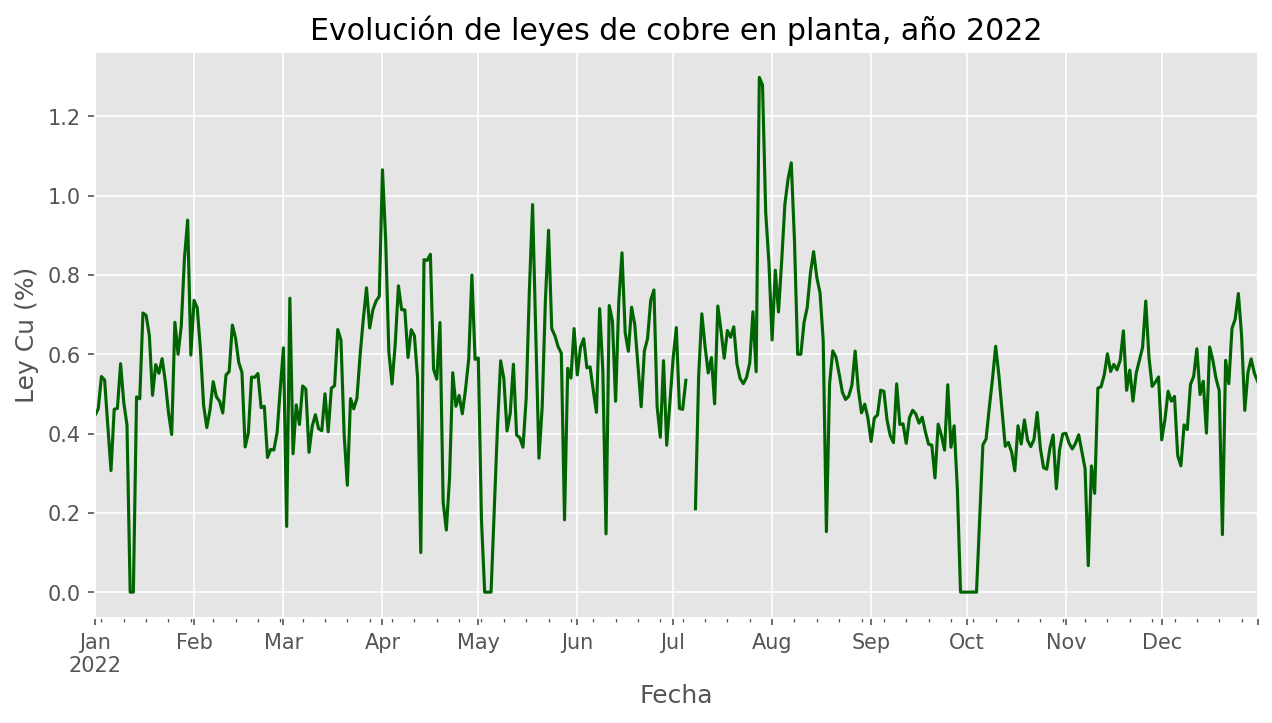

In [42]:
data["ley_cut"].plot(
    figsize=(10, 5), color="darkgreen", xlabel="Fecha", ylabel="Ley Cu (%)",
    title="Evolución de leyes de cobre en planta, año 2022"
);

### Remuestreo y conversión de frecuencias.
Una necesidad común a la hora de trabajar con series de tiempo corresponde al remuestreo conforme frecuencias de mayor o menor magnitud. Esto puede lograrse mediante el método `resample()`, o bien, `asfreq()`. 

El método `resample()`, como su nombre lo sugiere, permite tomar una serie o DataFrame cuyo índice sea del tipo `DatetimeIndex` y obtener un generador (que es un objeto de tipo `DatetimeIndexResampler`) que, a partir de cualquier operación de agregación permita remuestrear la data correspondiente conforme dicha lógica. Por ejemplo, podemos obtener un remuestreo semanal de nuestras leyes de cobre, donde cada observación corresponda al promedio para cada semana a partir de la data diaria:

In [43]:
# El método resample() construye un generador que, mediante una función de agregación,
# permite construir remuestreos de data sin ningún problema.
resampler = data["ley_cut"].resample("W")

In [44]:
# Este objeto es, en efecto, un generador.
type(resampler)

pandas.core.resample.DatetimeIndexResampler

In [45]:
# A partir del generador, obtenemos nuestro remuestreo conforme promedios.
data_resampled = resampler.mean()

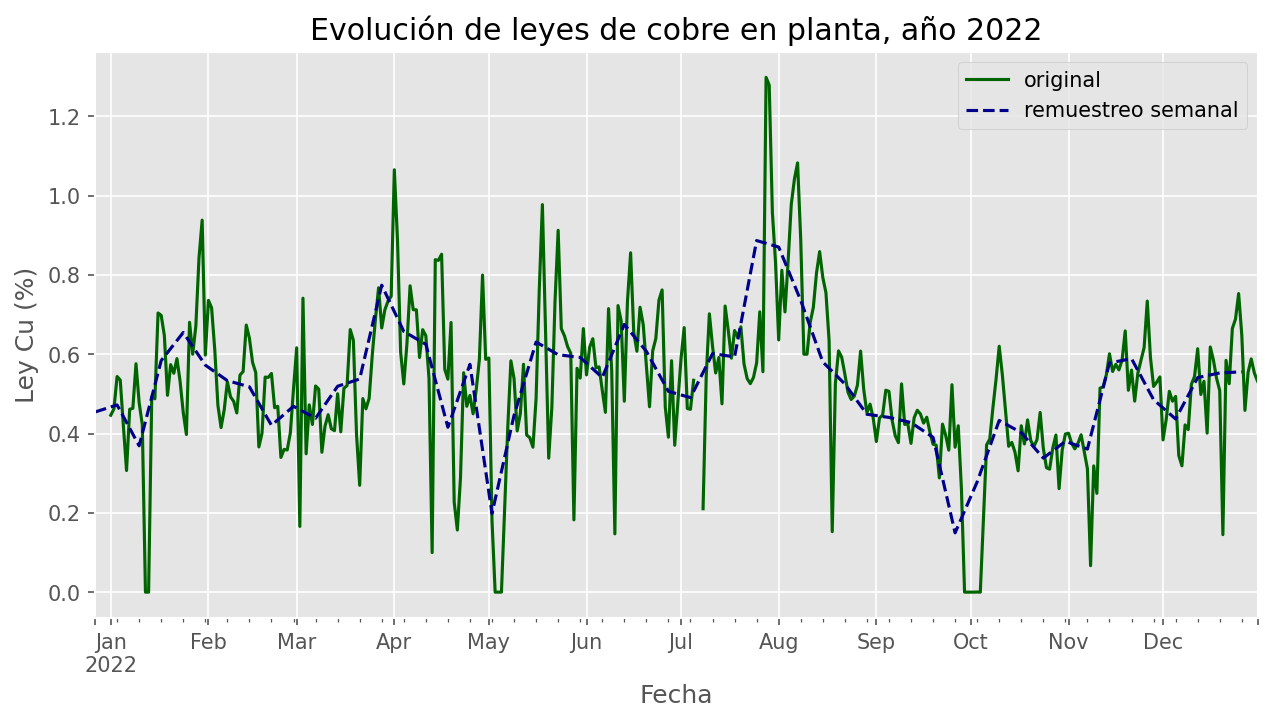

In [46]:
# Graficamos la data remuestreada y la comparamos con la original.
data["ley_cut"].plot(
    figsize=(10, 5), color="darkgreen",
    title="Evolución de leyes de cobre en planta, año 2022"
)
data_resampled.plot(
    figsize=(10, 5), color="darkblue", linestyle="--", xlabel="Fecha", ylabel="Ley Cu (%)",
    title="Evolución de leyes de cobre en planta, año 2022"
)
plt.legend(["original", "remuestreo semanal"], loc="upper right", frameon=True);

El método `asfreq()`, por otro lado, permite conseguir un resultado similar al del método `resample()`, con la diferencia que, a diferencia de éste último, `asfreq()` realiza una selección directa de la data remuestreada a partir de la original, construyendo dicho remuestreo *hacia adelante*. Es decir, tomando como referencia el conjunto de observaciones $x_{j+1}, x_{j+2}, ..., x_{j+r}$ para construir la agregación para las observaciones $x_{j-r}, x_{j-r+1}, ..., x_{j}$ (esto es importante, ya que `resample()` construye el remuestreo en la dirección inversa):

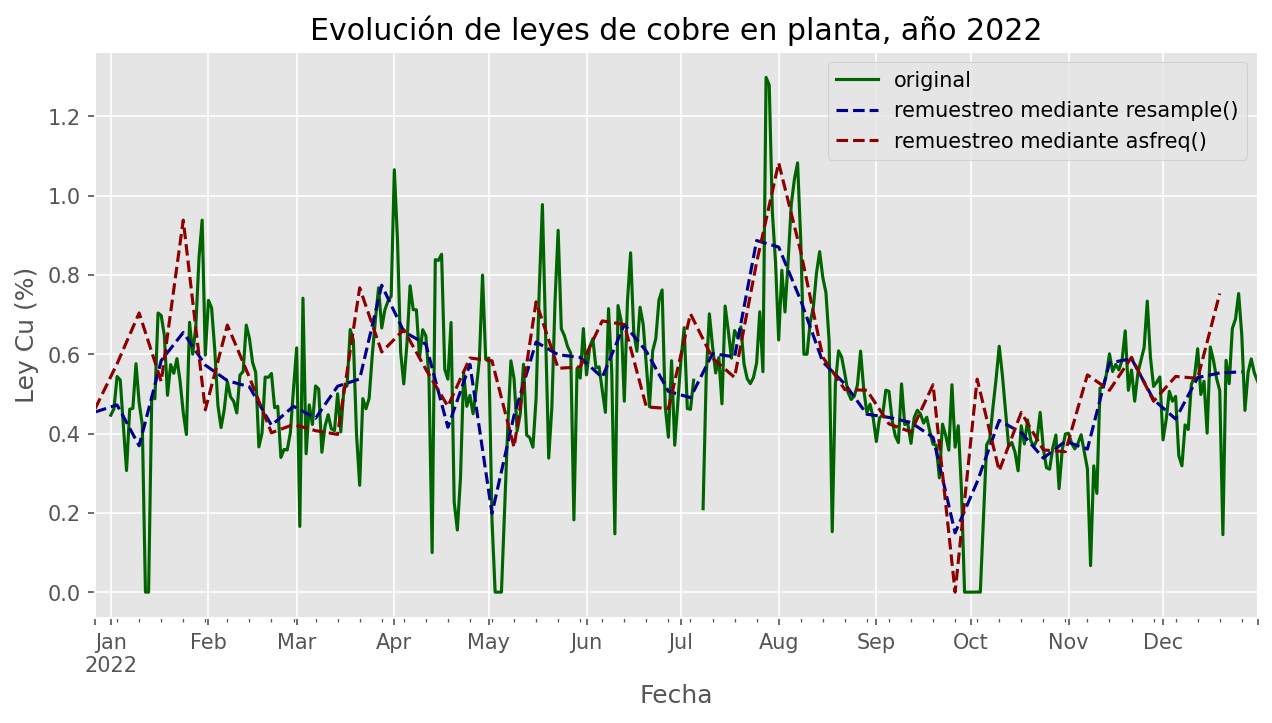

In [47]:
# Graficamos la data remuestreada mediante resample() y asfreq() y la comparamos con la original.
data["ley_cut"].plot(
    figsize=(10, 5), color="darkgreen",
    title="Evolución de leyes de cobre en planta, año 2022"
)
data_resampled.plot(
    figsize=(10, 5), color="darkblue", linestyle="--",
    title="Evolución de leyes de cobre en planta, año 2022"
)
data["ley_cut"].asfreq("W").plot(
    figsize=(10, 5), color="darkred", linestyle="--", xlabel="Fecha", ylabel="Ley Cu (%)",
    title="Evolución de leyes de cobre en planta, año 2022"
)
plt.legend(
    ["original", r"remuestreo mediante resample()", "remuestreo mediante asfreq()"],
    loc="upper right", frameon=True
);

Para el caso de un muestreo ascendente, `resample()` y `asfreq()` son, naturalmente, equivalentes, aunque el método `resample()` tiene disponibles muchas más opciones. En este caso, la opción por defecto para ambos métodos es dejar los puntos remuestreados con `nan` tantos períodos como el utilizado como referencia del remuestreo (los primeros o últimos, según sea el caso). De la misma forma que el método `fillna()` discutido al aprender el manejo de entradas con `nan`, `asfreq()` acepta un argumento `method` que hace referencia a como se especifican los valores imputados, que puede ser con un llenado progresivo (`ffill`) o regresivo (`bfill`).

### Desplazamientos (shifting).
Otra operación específica de las series de tiempo corresponde a los desplazamientos de la data en el tiempo. Para ello, **Pandas** dispone del método `shift()`, el cual nos permite desplazar la data una determinada cantidad de unidades de tiempo hacia adelante o hacia atrás, donde tales unidades son especificadas mediante un código de frecuencia mediante algún método de muestreo adecuado (por ejemplo, `asfreq()`):

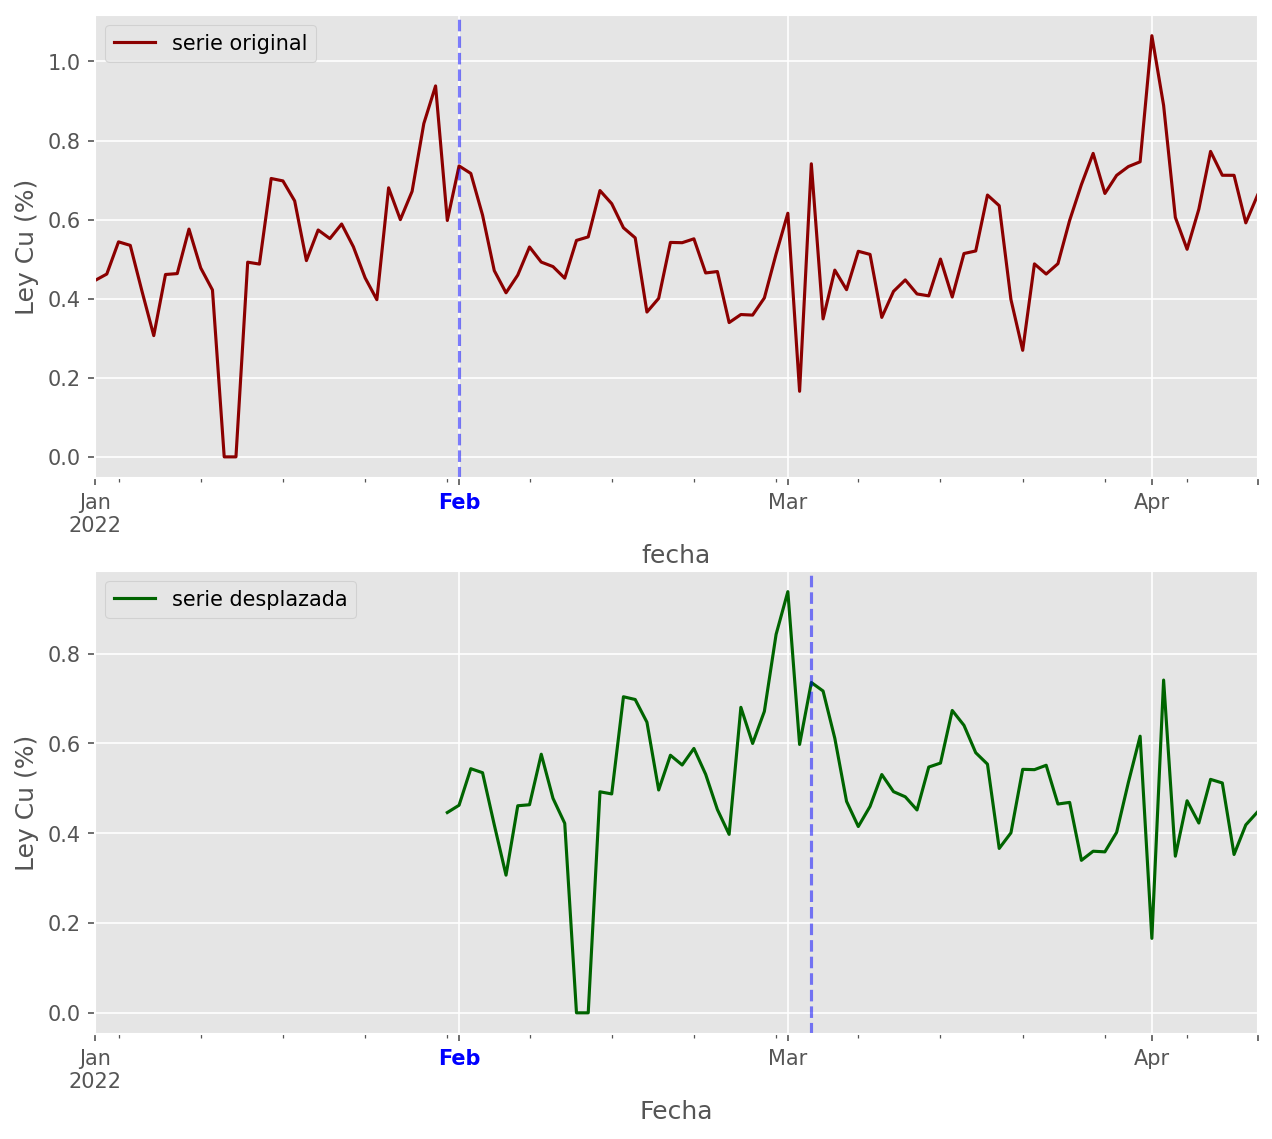

In [48]:
# Vamos a construir una figura para mostrar como funciona este método.
# Inicializamos la figura.
fig, ax = plt.subplots(nrows=2, figsize=(10, 9))

# Seleccionamos data de leyes para ilustrar este método (digamos, unos 100 días).
data_sel = data.iloc[:100, 0].copy()

# Asignamos una frecuencia diaria a esta data.
data_sel = data_sel.asfreq("D", method="pad")

# Graficamos esta serie de tiempo para dejarla como referencia.
data_sel.plot(ax=ax[0], color="darkred", ylabel="Ley Cu (%)")

# Graficamos la misma serie, pero desplazada 30 días hacia adelante.
data_sel.shift(periods=30).plot(ax=ax[1], color="darkgreen", ylabel="Ley Cu (%)", xlabel="Fecha")

# Vamos a marcar una línea que referencie este desplazamiento.
local_max = pd.to_datetime("2022-02-01")
offset = pd.Timedelta(30, "D")
ax[0].axvline(x=local_max, alpha=0.5, color="blue", linestyle="--")
ax[0].get_xticklabels()[1].set(weight='heavy', color='blue')
ax[1].axvline(x=local_max + offset, alpha=0.5, color="blue", linestyle="--")
ax[1].get_xticklabels()[1].set(weight='heavy', color='blue')

# Leyenda del gráfico.
ax[0].legend(["serie original"], loc=2)
ax[1].legend(["serie desplazada"], loc=2);

Podemos observar que `shift(periods=30)` desplaza toda la data 30 días hacia adelante un total de 30 dias (conforme el argumento `periods`), empujando esta data fuera de los límites del gráfico, dejando todos los valores anteriores al inicio de esta nueva serie vacíos (es decir, con valores de tipo `nan`). La línea azul corresponde simplemente a una línea de referencia que nos permite dimensionar la magnitud de este desplazamiento (que es de un mes).

En general, un contexto frecuente que motiva el uso de los desplazamientos de la data en el tiempo es el del cálculo de variables con un retardo o *lag* aplicado a las mismas, y que resulta ser común en ciertos modelos predictivos relativos a series de tiempo. Si disponemos de una serie llamada `data` y queremos obtener una versión de la misma con un retardo de `n` períodos, bastará con escribir `data.shift(periods=-n)`, ya que, como vimos en nuestro ejemplo gráfico, los desplazamientos positivos son progresivos en el tiempo. Siempre será posible establecer las unidades de tiempo de este desplazamiento mediante el argumento `freq`, añadiendo el código de frecuencia respectivo.

### Ventanas de tiempo móviles.
El cálculo de estadígrafos *móviles* corresponde a una tercera operación propia de las series de tiempo que **Pandas** es capaz de implementar, la cual puede aplicarse mediante el método `rolling()` a cualquier serie o DataFrame. Este método retorna una agregación de la data en términos de un determinado estadígrafo de interés, especificado por algún método de agregación (por ejemplo, la media o la mediana, mediante los métodos `mean()` y `median()`).

El método `rolling()` trae varias opciones disponibles. En primer lugar, el argumento `window` nos permite definir el número de observaciones que constituyen el tamaño de esta ventana móvil. Por otro lado, el argumento Booleano `center` nos permite definir si la ventana móvil estará centrada; es decir, si $t_{0}$ y $t_{2n}$ son los momentos en el tiempo que determinan extremos de esta ventana, `center=True` implica que cualquier agregación que realicemos estará referenciada en la observación $t_{n}$. Por otro lado, `center=False` referenciará dicha ventana en la observación $t_{2n}$.

Veamos los resultados de estas opciones de forma gráfica:

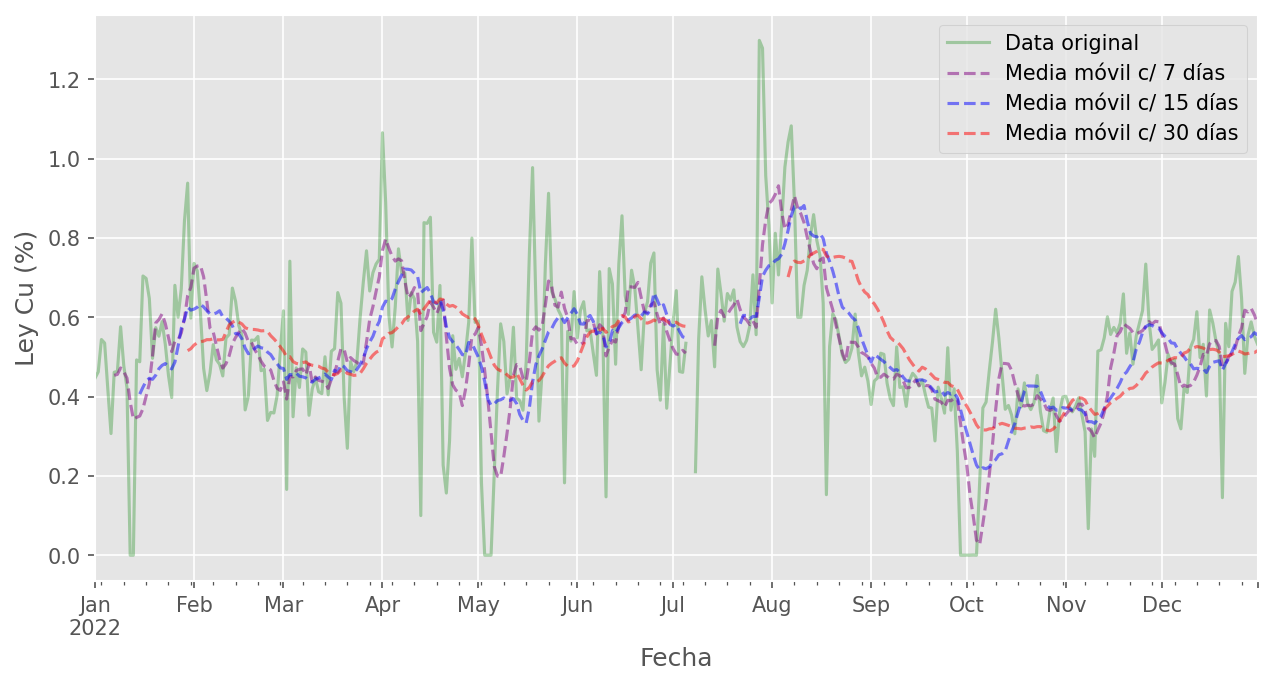

In [49]:
# Graficamos la data original de leyes.
data["ley_cut"].plot(figsize=(10, 5), color="green", alpha=0.3)

# Graficamos las medias móviles cada 7, 15 y 30 días.
data["ley_cut"].rolling(window=7).mean().plot(color="purple", alpha=0.5, linestyle="--")
data["ley_cut"].rolling(window=15).mean().plot(color="blue", alpha=0.5, linestyle="--")
data["ley_cut"].rolling(window=30).mean().plot(
    color="red", alpha=0.5, linestyle="--", xlabel="Fecha", ylabel="Ley Cu (%)"
)

# Leyenda del gráfico.
plt.legend(
    ["Data original", "Media móvil c/ 7 días", "Media móvil c/ 15 días", "Media móvil c/ 30 días"]
);

**Ejemplo 5.1 - Autocorrelación de una serie de tiempo:** En general, una serie de tiempo suele expresarse como una secuencia ordenada de observaciones discretas del tipo $\left\{x_{t}\right\}  =\left\{ x\left( t_{0}\right)  ,...,x\left( t_{n}\right) \right\}$, donde $t$ corresponde al número referido a la observación en dicho tiempo. Las series suelen ser muestreos de un conjunto más general de observaciones (no necesariamente finito), denotado como $\left\{X_{t}\right\}$, denominado **proceso estocástico** generador de la serie $\left\{x_{t}\right\}$.

Un primer acercamiento al análisis comportamental de las series de tiempo guarda relación con el concepto de **autocorrelación**. En términos bien generales, la autocorrelación de una serie de tiempo puede definirse como una métrica de la similitud existente entre la serie una copia de la misma con un retardo o *lag* de $k$ unidades de tiempo. Es decir, es una medida de correlación de una serie consigo misma, considerando un total de $k$ observaciones de la misma.

Sea pues $\left\{x_{t}\right\}$ una serie de tiempo, donde $t$ es cualquier observación arbitraria dentro del dominio de dicha serie. Sea $\bar{x}$ la media de las observaciones que conforman la serie $\left\{x_{t}\right\}$. Definimos la **función de autocorrelación con retardo o *lag* $k$** como

<p style="text-align: center;">$r_{k}\left( x_{t}\right)  =\displaystyle \frac{\displaystyle \sum\nolimits^{n}_{t=k+1} \left( x_{t}-\bar{x} \right)  \left( \left( x_{t-k}-\bar{x} \right)  \right)  }{\displaystyle \sum\nolimits^{n}_{t=1} \left( x_{t}-\bar{x} \right)^{2}  } $</p>
</p> <p style="text-align: right;">$(5.1)$</p>

Donde $x_{t} = x(t)$ es la realización de la serie $\left\{x_{t}\right\}$ en el tiempo $t$.

Cuando hablamos de un retardo o lag $k$, nos referimos a la realización de la serie que se encuentra $t-k$ períodos atrás en el tiempo. Es decir, $x_{t-k}$.

La autocorrelación nos permite entender si existe algún nivel de codependencia lineal importante entre observaciones para una cantidad determinada de pasos en el tiempo. Un instrumento gráfico importante que permite relacionar el número de pasos versus el valor de la autocorrelación correspondiente es el llamado **correlograma**. Tal instrumento gráfico es interesante en sí mismo, ya que nos permite comprobar rápidamente propiedades importantes de las series de tiempo, como periodicidad.

En **Pandas**, es posible calcular la autocorrelación de cualquier serie de tiempo mediante el método `autocorr()`, con respecto a cualquier magnitud de retardo usando el parámetro `lag`. 

Vamos a aplicar este método usando nuestro DataFrame `data`, considerando, nuevamente, las leyes de cobre de alimentación, a fin de construir un correlograma que nos permita entender rápidamente si existe una codependencia importante entre las observaciones de estas leyes en una extensión de dos semanas. Para ello, construiremos una función sencilla que calculará la autocorrelación de cualquier serie de tiempo para un retardo dado:

In [50]:
# Nuestra función de cálculo de autocorrelación.
def autocorrelation(s: pd.Series, lag_vals: list) -> list:
    """
    Una función sencilla que nos permite calcular las autocorrelaciones sucesivas de una serie
    de tiempo (definida como una serie de Pandas), almacenando cada uno de estos cálculos en una
    lista de Python.
    
    Parámetros:
    -----------
    s : Serie de Pandas cuyo índice es del tipo DatetimeIndex.
    lag : Lista de Python que define los retardos a aplicar en el cálculo de la autocorrelación.
    """
    # Calculamos las autocorrelaciones para todos los valores en el intervalo [1, lag].
    autocorr = [s.autocorr(lag=lag) for lag in lag_vals]
    
    return autocorr

Usaremos esta función para construir el correlograma usando la librería **Matplotlib**. No ahondaremos mucho en detalle en relación a las funciones de graficación, ya que, en la próxima sección, ahondaremos en detalle en todo lo que respecta a la construcción de gráficos:

In [51]:
# Calculamos las autocorrelaciones correspondientes.
acorr = autocorrelation(data["ley_cut"], lag_vals=np.arange(1, 15))

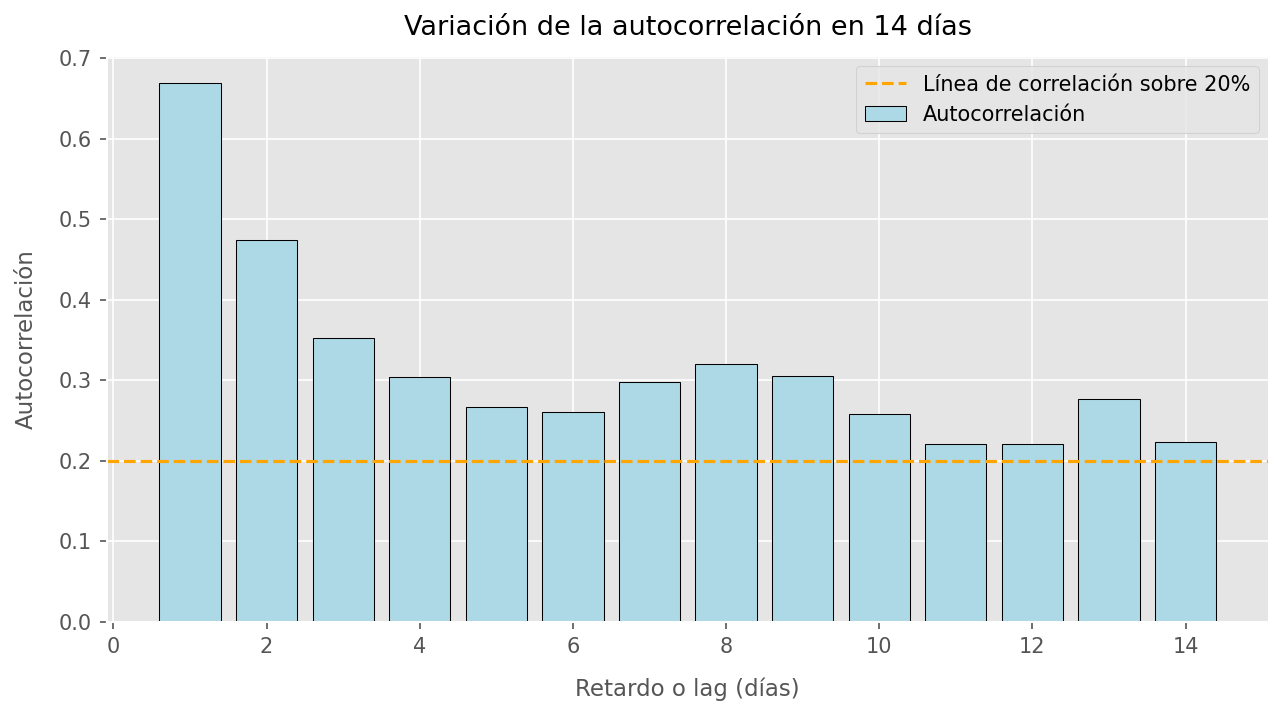

In [52]:
# Generamos el gráfico.
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(np.arange(1, 15), acorr, color="lightblue", edgecolor="k", label="Autocorrelación")
ax.axhline(y=0.2, color="orange", linestyle="--", label="Línea de correlación sobre 20%")
ax.set_xlabel("Retardo o lag (días)", fontsize=11, labelpad=10)
ax.set_ylabel("Autocorrelación", fontsize=11, labelpad=10)
ax.set_title("Variación de la autocorrelación en 14 días", fontsize=13, pad=10)
ax.legend(loc="upper right", frameon=True);

Observamos que las leyes de alimentación presentan una autocorrelación que siempre se mantiene por encima del 20%, lo que bien podría implicar que las observaciones relativas a esta ley no sean necesariamente independientes. Aunque concluir algo así con suficiente evidencia estadística requeriría de una prueba de hipótesis adecuada. ◼

## Un último comentario acerca de las zonas horarias.
Por defecto, todos los objetos de tipo `Timestamp` y similares que construyamos en **Pandas** son *ingenuos* en relación a la zona horaria respecto de la cual debieran estar definidos. Por esta razón, un timestamp como `"2022-12-26 15:00:00"` podría significar "26 de Diciembre de 2022, 3 PM" en cualquier parte del mundo (Santiago, París o Budapest). Sin embargo, **Pandas** nos provee de herramientas que permitan que estos objetos sí tengan relación con alguna **zona horaria**, como sería el caso del método `tz_localize()`

Extraigamos parte de la data relativa al DataFrame `data` para probar este método:

In [53]:
# Seleccionamos algo de data.
data_sel = data.loc["2022-08-01":"2022-08-15", "ley_cut"].copy()

In [54]:
# Mostramos la data en pantalla.
data_sel

fecha
2022-08-01    0.635961
2022-08-02    0.811709
2022-08-03    0.706604
2022-08-04    0.834970
2022-08-05    0.978202
2022-08-06    1.041763
2022-08-07    1.082601
2022-08-08    0.887938
2022-08-09    0.600000
2022-08-10    0.600000
2022-08-11    0.680078
2022-08-12    0.718085
2022-08-13    0.804683
2022-08-14    0.858726
2022-08-15    0.793775
Name: ley_cut, dtype: float64

Procedemos ahora a *localizar* esta data:

In [55]:
# Localizamos esta data en Santiago de Chile.
data_sel.tz_localize("America/Santiago")

fecha
2022-08-01 00:00:00-04:00    0.635961
2022-08-02 00:00:00-04:00    0.811709
2022-08-03 00:00:00-04:00    0.706604
2022-08-04 00:00:00-04:00    0.834970
2022-08-05 00:00:00-04:00    0.978202
2022-08-06 00:00:00-04:00    1.041763
2022-08-07 00:00:00-04:00    1.082601
2022-08-08 00:00:00-04:00    0.887938
2022-08-09 00:00:00-04:00    0.600000
2022-08-10 00:00:00-04:00    0.600000
2022-08-11 00:00:00-04:00    0.680078
2022-08-12 00:00:00-04:00    0.718085
2022-08-13 00:00:00-04:00    0.804683
2022-08-14 00:00:00-04:00    0.858726
2022-08-15 00:00:00-04:00    0.793775
Name: ley_cut, dtype: float64

Vemos que la localización ha añadido un `-04:00` a todos los elementos del `DatetimeIndex`. La razón de ésto es que, por defecto, los tiempos en **Pandas** están definidos en la zona horaria **UTC**. Por lo tanto, la adición de `-04:00` a todos los tiempos implica que la zona horaria es ahora **UTC-4**.

Otro ejemplo de localización:

In [56]:
# Localizamos esta data en Tokio, Japón.
data_sel.tz_localize("Asia/Tokyo")

fecha
2022-08-01 00:00:00+09:00    0.635961
2022-08-02 00:00:00+09:00    0.811709
2022-08-03 00:00:00+09:00    0.706604
2022-08-04 00:00:00+09:00    0.834970
2022-08-05 00:00:00+09:00    0.978202
2022-08-06 00:00:00+09:00    1.041763
2022-08-07 00:00:00+09:00    1.082601
2022-08-08 00:00:00+09:00    0.887938
2022-08-09 00:00:00+09:00    0.600000
2022-08-10 00:00:00+09:00    0.600000
2022-08-11 00:00:00+09:00    0.680078
2022-08-12 00:00:00+09:00    0.718085
2022-08-13 00:00:00+09:00    0.804683
2022-08-14 00:00:00+09:00    0.858726
2022-08-15 00:00:00+09:00    0.793775
Name: ley_cut, dtype: float64

Ahora hemos logrado una localización **UTC+9**.

## Comentarios finales.
La inclusión del manejo de series de tiempo en **Pandas** nos permite, junto a todo lo que hemos aprendido en las últimas secciones, disponer de una poderosa caja de herramientas basada en la librería **Pandas**. Junto a lo que también hemos aprendido de **Numpy**, podemos decir que ya estamos en condiciones de realizar todo tipo de análisis de datos en cualquier conjunto de datos de tipo tabular y al cual podamos acceder mediante estas herramientas.

En las próximas secciones, nos abocaremos a profundizar en detalle en temas relativos a la graficación y reportabilidad mediante el uso de la librería **Matplotlib**. Aprenderemos a construir todo tipo de gráficos y a personalizarlos como deseemos y conforme las necesidades que se vayan levantando en relación a los problemas que nos aboquemos a soolucionar.